In [14]:
!pip install numpy pandas sklearn SimpSOM matplotlib plotly

In [15]:
#As usual we start importing a number of libraries that will be come in handy later on
import numpy as np 
import pandas as pd 
#from scipy.misc import imsave
from sklearn.preprocessing import StandardScaler

In [16]:
#Lire CSV
data = pd.read_csv("EducationSéries2005-2010.csv")

#Enregistrer les pays pour la visualisation
countries = data.iloc[:,1].values

#conserver seulement les données numériques
data = data.drop(data.columns[0:3],axis=1)
data = data.fillna(0)


In [17]:
#normaliser les valeurs
train = StandardScaler().fit_transform(data.values)
#affichage
print(pd.DataFrame(train).head())
print(np.unique(countries))

          0         1         2         3         4         5
0 -0.542695 -0.674402 -0.730505 -0.835072 -0.825944  0.833375
1 -0.542695 -0.674402 -0.730505 -0.835072 -0.825944  0.977020
2 -0.542695 -0.674402 -0.730505 -0.835072 -0.825944  0.899011
3 -0.542695 -0.674402 -0.730505 -0.835072 -0.825944  0.001930
4 -0.542695 -0.674402 -0.730505 -0.835072 -0.825944  0.004865
['ABW' 'ALB' 'AND' 'ARE' 'ARG' 'AUS' 'AUT' 'AZE' 'BEL' 'BFA' 'BGR' 'BHR'
 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'CAN' 'CHE' 'CHL' 'CHN' 'CMR'
 'COL' 'CRI' 'CYM' 'CYP' 'CZE' 'DEU' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP'
 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'GBR' 'GHA' 'GIN' 'GRC' 'GTM' 'HKG' 'HND'
 'HUN' 'IDN' 'IRL' 'IRN' 'ISL' 'ISR' 'ITA' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KHM' 'KOR' 'KWT' 'LBN' 'LCA' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MDA'
 'MDV' 'MEX' 'MLI' 'MLT' 'MNG' 'MYS' 'NGA' 'NLD' 'NOR' 'NZL' 'OMN' 'PAK'
 'PAN' 'PER' 'PHL' 'POL' 'PRI' 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS'
 'SEN' 'SGP' 'SLV' 'SRB' 'SSD' 'SVN' 'SWE' '

In [18]:
#Import the library
import SimpSOM as sps

#Build a network 12x12 with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 
net = sps.somNet(12, 12, train, PBC=True,PCI=True)

#Train the network for 10000 epochs and with initial learning rate of 0.01. 
net.train(0.01, 10000)

#Save the weights to file
net.save('som_weights_Education')

Periodic Boundary Conditions active.
The weights will be initialised with PCA.
Training SOM... done!


In [19]:
help(net)

Help on somNet in module SimpSOM object:

class somNet(builtins.object)
 |  somNet(netHeight, netWidth, data, loadFile=None, PCI=0, PBC=0, n_jobs=-1)
 |  
 |  Kohonen SOM Network class.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, netHeight, netWidth, data, loadFile=None, PCI=0, PBC=0, n_jobs=-1)
 |      Initialise the SOM network.
 |      
 |      Args:
 |          netHeight (int): Number of nodes along the first dimension.
 |          netWidth (int): Numer of nodes along the second dimension.
 |          data (np.array or list): N-dimensional dataset.
 |          loadFile (str, optional): Name of file to load containing information 
 |              to initialise the network weights.
 |          PCI (boolean): Activate/Deactivate Principal Component Analysis to set
 |              the initial value of weights
 |          PBC (boolean): Activate/Deactivate periodic boundary conditions,
 |              warning: only quality threshold clustering algorithm works with PBC.
 |    

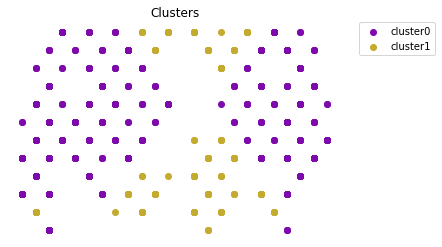

<Figure size 432x288 with 0 Axes>

In [20]:
clusters = net.cluster(train,show=True)

In [21]:
print(train.shape)

n = np.size(clusters)

print(n)

(996, 6)
2
C:\Users\ayman\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [22]:
CountryClusters = list()
for i in range(n):
    print("i : {} , cluster[i] : {}".format(i,clusters[i]))
    CountryClusters.append(countries[clusters[i]])

i : 0 , cluster[i] : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 42, 43, 44, 48, 49, 50, 57, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 87, 89, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 165, 166, 167, 174, 175, 176, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 207, 208, 209, 216, 217, 218, 225, 226, 227, 234, 235, 236, 243, 244, 245, 249, 250, 251, 252, 253, 254, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 279, 280, 281, 285, 286, 287, 288, 289, 290, 291, 292, 293, 297, 298, 299, 300, 301, 302, 

In [23]:
for idx,c in enumerate(CountryClusters):
    print("COUNTRIES OF {} CLUSTER : {}".format(idx,len(c)))

COUNTRIES OF 0 CLUSTER : 727
COUNTRIES OF 1 CLUSTER : 269


In [24]:
import matplotlib.pyplot as plt
project = net.project(train,show=False,labels=countries)

<Figure size 432x288 with 0 Axes>

In [25]:
p = net.find_bmu(train[0])

In [26]:
help(p)

Help on somNode in module SimpSOM object:

class somNode(builtins.object)
 |  somNode(x, y, numWeights, netHeight, netWidth, PBC, minVal=[], maxVal=[], pcaVec=[], weiArray=[])
 |  
 |  Single Kohonen SOM Node class.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x, y, numWeights, netHeight, netWidth, PBC, minVal=[], maxVal=[], pcaVec=[], weiArray=[])
 |      Initialise the SOM node.
 |      
 |      Args:
 |          x (int): Position along the first network dimension.
 |          y (int): Position along the second network dimension
 |          numWeights (int): Length of the weights vector.
 |          netHeight (int): Network height, needed for periodic boundary conditions (PBC)
 |          netWidth (int): Network width, needed for periodic boundary conditions (PBC)
 |          PBC (bool): Activate/deactivate periodic boundary conditions.
 |          minVal(np.array, optional): minimum values for the weights found in the data
 |          maxVal(np.array, optional): maximum va

In [27]:
d = p.__dict__

In [28]:
d['pos']

[1, 0.0]

In [29]:
project[0]

[1, 0.0]

In [30]:
x=[]
y=[]
for idx,p in enumerate(project):
    pos_countries.append([p, countries[idx]])
    x.append(p[0])
    y.append(p[1])

In [31]:
labels = np.zeros(countries.size)
print(labels.size)
for k,c in enumerate(clusters):
    print("cluster ",k)
    for i in c:
        labels[i] = k

996
cluster  0
cluster  1


In [32]:
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.

In [33]:
x = np.array(x)
y = np.array(y)
labels = np.array(labels)

compressed_points = []
clist = []
for c in countries:
    if c not in clist:
        clist.append(c)
        #chercher les index du pays c
        idx = np.where(countries == c)
        idx = idx[0]

        moyX = np.sum(x[idx])/len(idx)
        moyY = np.sum(y[idx])/len(idx)
        # end of X Y GENRALISATION

        #Chercher le classement le plus fréquent
        unique, counts = np.unique(labels[idx], return_counts=True)
        maxLabel = unique[np.argmax(counts)]

        #ajouter les données dans une seule ligne
        compressed_points.append( [moyX,moyY,int(maxLabel),c] )

In [34]:
compressed_points = np.array(compressed_points)

print(compressed_points)

[['0.3333333333333333' '1.154700538379252' '0' 'ABW']
 ['2.2222222222222223' '5.196152422706632' '0' 'ALB']
 ['11.0' '6.928203230275511' '0' 'AND']
 ['10.61111111111111' '5.869727736761195' '0' 'ARE']
 ['3.25' '7.36121593216773' '0' 'ARG']
 ['7.555555555555555' '9.430054396763888' '1' 'AUS']
 ['7.75' '3.0310889132455348' '0' 'AUT']
 ['7.444444444444445' '2.3094010767585034' '1' 'AZE']
 ['3.6666666666666665' '8.660254037844387' '0' 'BEL']
 ['0.3888888888888889' '4.522577108652069' '0' 'BFA']
 ['5.416666666666667' '9.093266739736608' '1' 'BGR']
 ['0.6111111111111112' '0.6735753140545635' '1' 'BHR']
 ['0.6666666666666666' '0.5773502691896258' '0' 'BHS']
 ['0.2777777777777778' '1.8282758524338152' '0' 'BIH']
 ['4.0' '3.4641016151377553' '0' 'BLR']
 ['0.7777777777777778' '1.5396007178390023' '0' 'BLZ']
 ['0.75' '0.4330127018922194' '0' 'BMU']
 ['3.5555555555555554' '6.158402871356009' '0' 'BOL']
 ['3.9444444444444446' '6.4470780059508215' '0' 'BRA']
 ['1.0' '6.928203230275511' '0' 'CAN']
 [

In [35]:
x = np.array(compressed_points[:,0],dtype='float')
y = np.array(compressed_points[:,1],dtype='float')
labels = np.array(compressed_points[:,2],dtype=int)
countryNames = compressed_points[:,3]

print(" x : {} ,  y : {} , labels : {} , countryNames : {} ".format(x[0],y[0],labels[0],countryNames[0]))

 x : 0.3333333333333333 ,  y : 1.154700538379252 , labels : 0 , countryNames : ABW 


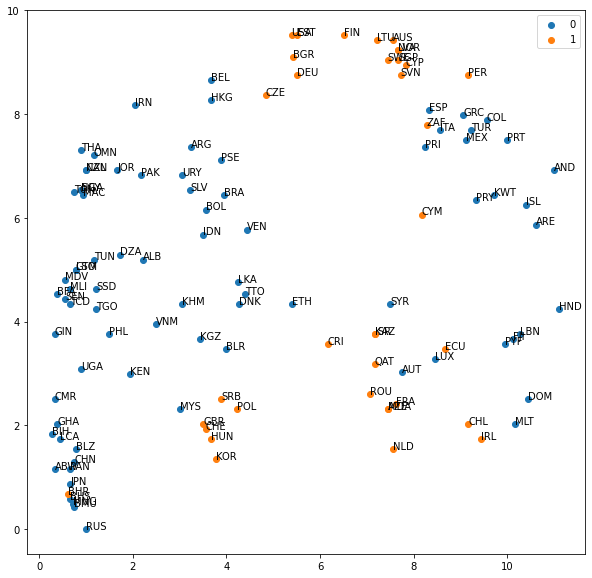

In [36]:
scatter_x = np.array(x)
scatter_y = np.array(y)
group = np.array(labels,dtype=int)
cdict = {1: 'red', 2: 'blue', 3: 'green'}

plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots()
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()

for i, txt in enumerate(countryNames):
    ax.annotate(txt, (x[i], y[i]))

plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(x=scatter_x, y=scatter_y, text=countryNames, size_max=100, color=group)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Clustering of countries', title_x=0.5)
fig.show()